**РК1, ИУ5-25М Стрихар П.А.**

О наборе данных

Входные переменные (на основе физико-химических тестов):

1 - фиксированная кислотность

2 - летучая кислотность

3 - лимонная кислота

4 - остаточный сахар

5 - хлориды

6 - свободный диоксид серы

7 - общий диоксид серы

8 - плотность

9 - pH

10 - сульфаты

11 - алкоголь

Выходная переменная (на основе сенсорных данных):

12 - качество (оценка между 0 и 10)

Задача №12.

Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "логарифм - np.log(X)".

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
data = pd.read_csv("winequality-red.csv", sep=',')
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
#Выберем числовой признак Бти (индекс массы тела) для нормализации:
feature_to_normalize = 'alcohol'

In [10]:
#Нормализация выбранного признака с использованием логарифма:
data[ 'normalized_' + feature_to_normalize] = np.log(data[feature_to_normalize])


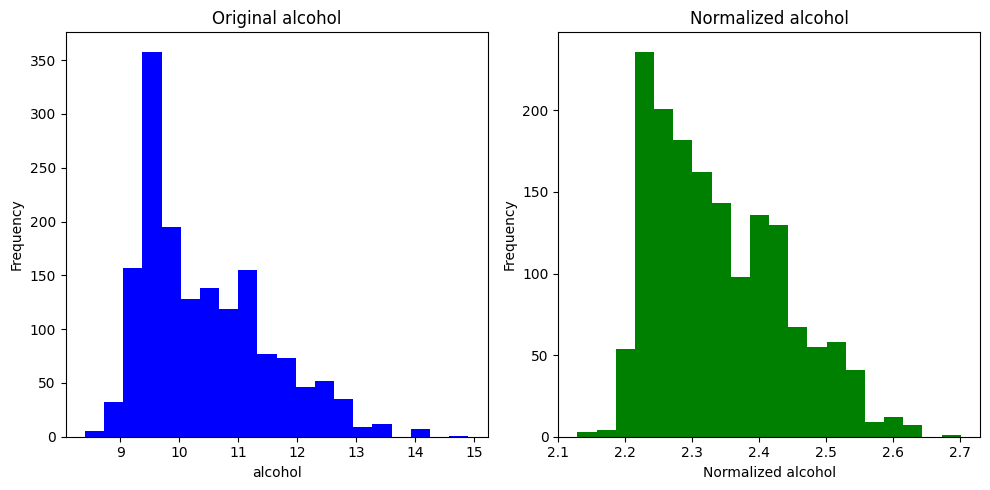

In [13]:
#Визуализация исходного и нормализованного признаков:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.hist(data[ feature_to_normalize], bins=20, color='blue')
plt.title("Original " + feature_to_normalize)
plt.xlabel(feature_to_normalize)
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(data[ 'normalized_' + feature_to_normalize], bins=20, color='green')
plt.title('Normalized ' + feature_to_normalize)
plt.xlabel('Normalized ' + feature_to_normalize)
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Задача №32.

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), обратный алгоритм (sequential backward selection).

In [14]:
!pip install mlxtend

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [16]:
data_1 = pd.read_csv("winequality-red.csv", sep=',')
data_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
#Определение признаков и целевой переменной:
X = data.drop(['quality'], axis=1)
Y = data['quality']


In [20]:
#Разделение данных на обучающий и тестовый наборы:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
print("Пропущенные значения в X_train:", X_train.isnull().sum())
print("Пропущенные значения в y_train:", y_train.isnull().sum())

Пропущенные значения в X_train: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
normalized_alcohol      0
dtype: int64
Пропущенные значения в y_train: 0


In [24]:
X_train_encoded = pd.get_dummies(X_train)
#Определение модели (случайный лес):
rf = RandomForestRegressor()

In [26]:
#Определение метода отбора признаков (рекурсивное исключение признаков с кросс-валидацией)
rfecv = RFECV(estimator=rf, step=1, v=5, scoring='r2')
rfecv.fit(X_train_encoded, y_train)


RFECV(cv=5, estimator=RandomForestRegressor(), scoring='r2')

In [27]:
print("Optimal number оf features : %d" % rfecv.n_features_)
print("Selected features:", X_train_encoded.columns[rfecv.support_])


Optimal number оf features : 12
Selected features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'normalized_alcohol'],
      dtype='object')
